In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import sqlite3

In [13]:
con = sqlite3.connect(r'F:\1-Data analysis Project Udemy\Amazon_sales/database.sqlite')

In [14]:
type(con)

sqlite3.Connection

In [15]:
df = pd.read_sql_query("select * from REVIEWS", con)

In [16]:
df.shape

(568454, 10)

In [17]:
### data preparation for analysis

In [18]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [19]:
df.head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...


In [20]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [21]:
(df['HelpfulnessNumerator']>df['HelpfulnessDenominator']).sum()

2

In [22]:
df_valid = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]

In [23]:
df_valid.shape

(568452, 10)

In [24]:
df_valid.duplicated(['UserId', 'ProfileName','Time','Text']).sum()

174521

In [25]:
data = df_valid.drop_duplicates(subset=['UserId', 'ProfileName','Time','Text'])

In [26]:
data.shape

(393931, 10)

In [27]:
pd.to_datetime(data['Time'])

0        1970-01-01 00:00:01.303862400
1        1970-01-01 00:00:01.346976000
2        1970-01-01 00:00:01.219017600
3        1970-01-01 00:00:01.307923200
4        1970-01-01 00:00:01.350777600
                      ...             
568449   1970-01-01 00:00:01.299628800
568450   1970-01-01 00:00:01.331251200
568451   1970-01-01 00:00:01.329782400
568452   1970-01-01 00:00:01.331596800
568453   1970-01-01 00:00:01.338422400
Name: Time, Length: 393931, dtype: datetime64[ns]

In [28]:
data['Time'] = pd.to_datetime(data['Time'], unit='s')

C:\Users\imran\AppData\Local\Temp\ipykernel_23228\145857406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'] = pd.to_datetime(data['Time'], unit='s')


In [29]:
data.loc[:,'Time'] = pd.to_datetime(data['Time'], unit='s')

In [30]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

### Analyse to what Amazon can recommend products??

In [32]:
data.shape

(393931, 10)

In [33]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [34]:
data['ProfileName']

0                              delmartian
1                                  dll pa
2         Natalia Corres "Natalia Corres"
3                                    Karl
4           Michael D. Bigham "M. Wassir"
                       ...               
568449                   Lettie D. Carter
568450                          R. Sawyer
568451                      pksd "pk_007"
568452            Kathy A. Welch "katwel"
568453                           srfell17
Name: ProfileName, Length: 393931, dtype: object

In [35]:
data['ProfileName'].unique()

array(['delmartian', 'dll pa', 'Natalia Corres "Natalia Corres"', ...,
       'Lettie D. Carter', 'pksd "pk_007"', 'srfell17'], dtype=object)

In [36]:
data['ProfileName'].nunique()

218418

In [37]:
data['UserId']

0         A3SGXH7AUHU8GW
1         A1D87F6ZCVE5NK
2          ABXLMWJIXXAIN
3         A395BORC6FGVXV
4         A1UQRSCLF8GW1T
               ...      
568449    A28KG5XORO54AY
568450    A3I8AFVPEE8KI5
568451    A121AA1GQV751Z
568452     A3IBEVCTXKNOH
568453    A3LGQPJCZVL9UC
Name: UserId, Length: 393931, dtype: object

In [38]:
data['UserId'].unique()

array(['A3SGXH7AUHU8GW', 'A1D87F6ZCVE5NK', 'ABXLMWJIXXAIN', ...,
       'A28KG5XORO54AY', 'A121AA1GQV751Z', 'A3LGQPJCZVL9UC'], dtype=object)

In [39]:
data['UserId'].nunique()

256059

In [40]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [41]:
data.groupby(['UserId']).agg({'ProductId':'count','Summary':'count','Score':'mean','Text':'count'})

,ProductId,Summary,Score,Text
UserId,,,,
#oc-R103C0QSV1DF5E,1,1,5.000000,1
#oc-R109MU5OBBZ59U,1,1,5.000000,1
#oc-R10LFEMQEW6QGZ,1,1,5.000000,1
#oc-R10LT57ZGIB140,1,1,3.000000,1
#oc-R10UA029WVWIUI,1,1,1.000000,1
...,...,...,...,...
AZZV9PDNMCOZW,3,3,4.666667,3
AZZVNIMTTMJH6,1,1,5.000000,1
AZZY649VYAHQS,1,1,5.000000,1


In [42]:
recommend_df = data.groupby(['UserId']).agg({'ProductId':'count','Summary':'count','Score':'mean','Text':'count'}).sort_values(by='ProductId',ascending=False)

In [43]:
recommend_df.columns = ['Num_of_products_purchased','Number_of_summaries','Avg_score','Num_of_Text']

In [44]:
recommend_df

,Num_of_products_purchased,Number_of_summaries,Avg_score,Num_of_Text
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [45]:
recommend_df.head(10)

,Num_of_products_purchased,Number_of_summaries,Avg_score,Num_of_Text
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
A2MUGFV2TDQ47K,161,161,3.826087,161
A3D6OI36USYOU1,146,146,4.417808,146
AZV26LP92E6WU,129,129,4.852713,129
AKMEY1BSHSDG7,119,119,4.747899,119


In [46]:
recommend_df.index[:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [47]:
recommend_df['Num_of_products_purchased'].index[:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [48]:
recommend_df['Num_of_products_purchased'][:10].values

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118], dtype=int64)

<BarContainer object of 10 artists>

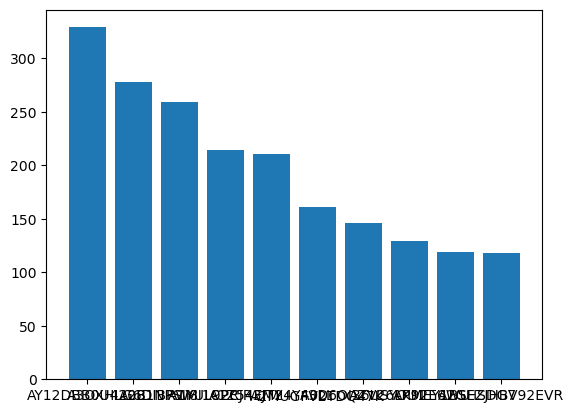

In [49]:
plt.bar(recommend_df.index[:10],recommend_df['Num_of_products_purchased'][:10].values)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AY12DBB0U420B'),
  Text(1, 0, 'A3OXHLG6DIBRW8'),
  Text(2, 0, 'A281NPSIMI1C2R'),
  Text(3, 0, 'A1YUL9PCJR3JTY'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A2MUGFV2TDQ47K'),
  Text(6, 0, 'A3D6OI36USYOU1'),
  Text(7, 0, 'AZV26LP92E6WU'),
  Text(8, 0, 'AKMEY1BSHSDG7'),
  Text(9, 0, 'A2GEZJHBV92EVR')])

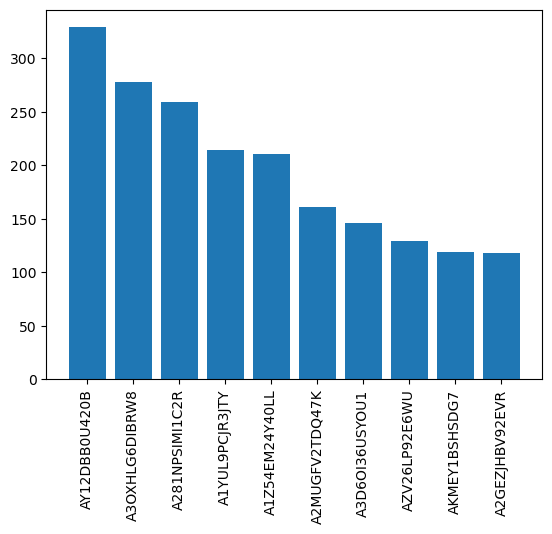

In [50]:
plt.bar(recommend_df.index[:10],recommend_df['Num_of_products_purchased'][:10].values)
plt.xticks(rotation='vertical')

### Which product has good number of reviews?

In [52]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [53]:
len(data['ProductId'].unique())   # or use nunique

67624

In [54]:
## no. of product^

In [55]:
prod_count = data['ProductId'].value_counts()

In [56]:
prod_count = data['ProductId'].value_counts().to_frame()

In [57]:
prod_count

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1


In [58]:
prod_count[prod_count['count']>500]

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541


In [59]:
frequent_prod_ids = prod_count[prod_count['count']>500].index

In [60]:
frequent_prod_ids

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object', name='ProductId')

In [61]:
data['ProductId'].isin(frequent_prod_ids)

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 393931, dtype: bool

In [62]:
data[data['ProductId'].isin(frequent_prod_ids)]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


In [63]:
freq_prod_df = data[data['ProductId'].isin(frequent_prod_ids)]

In [64]:
freq_prod_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

<Axes: xlabel='count', ylabel='ProductId'>

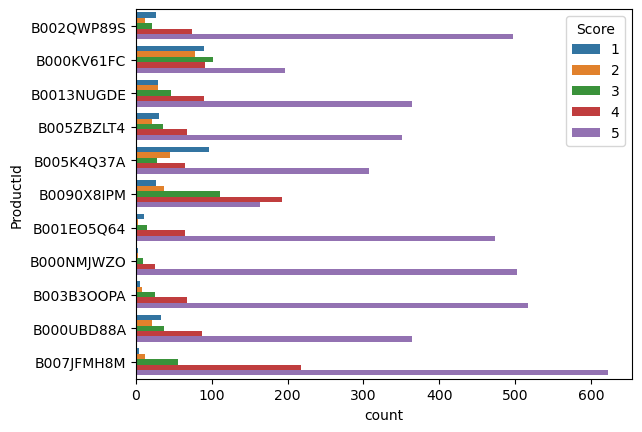

In [65]:
sns.countplot(y = 'ProductId', data = freq_prod_df, hue='Score')

### is there Difference between behaviour in frequent viewers and not frequent viwers

In [67]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [68]:
x = data['UserId'].value_counts()

In [69]:
x

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
AAQPR1MSRXKTU       1
AGO81Z6PZSF7P       1
ALA84XWMTQBFT       1
A1G9DK8EUR36JC      1
A3LGQPJCZVL9UC      1
Name: count, Length: 256059, dtype: int64

In [70]:
data.head(7)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,2012-07-12,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,2012-06-20,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...


In [71]:
data['viewer_type'] = data['UserId'].apply(lambda user:"Frequent" if x[user]>50 else "Not Frequent")

In [72]:
x['AY12DBB0U420B']

329

In [73]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,Not Frequent
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,Not Frequent
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Not Frequent
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,Not Frequent


In [74]:
data['viewer_type']=="Not Frequent"

0         True
1         True
2         True
3         True
4         True
          ... 
568449    True
568450    True
568451    True
568452    True
568453    True
Name: viewer_type, Length: 393931, dtype: bool

In [75]:
not_freq_df = data[data['viewer_type']=="Not Frequent"]
freq_df = data[data['viewer_type']=="Frequent"]

In [76]:
freq_df['Score'].value_counts()

Score
5    5765
4    1979
3     897
2     368
1     349
Name: count, dtype: int64

<Axes: xlabel='Score'>

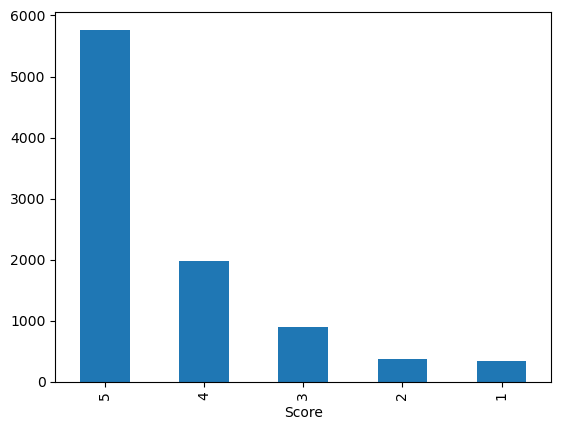

In [77]:
freq_df['Score'].value_counts().plot(kind='bar')

In [78]:
freq_df['Score'].value_counts()/len(freq_df)*100

Score
5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: count, dtype: float64

In [79]:
not_freq_df['Score'].value_counts()/len(not_freq_df)*100

Score
5    63.757986
4    14.071191
1     9.349850
3     7.507547
2     5.313426
Name: count, dtype: float64

<Axes: xlabel='Score'>

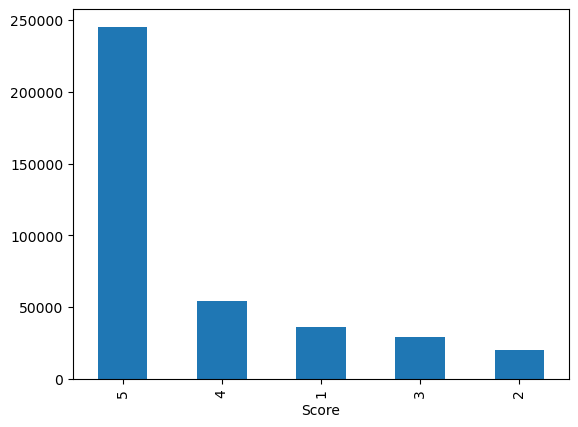

In [80]:
not_freq_df['Score'].value_counts().plot(kind='bar')

### Are frequent users are more verbose(comments)

In [82]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'viewer_type'],
      dtype='object')

In [83]:
data['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 393931, dtype: object

In [84]:
data[['UserId','ProductId','Text']]

,UserId,ProductId,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Great taffy at a great price. There was a wid...
...,...,...,...
568449,A28KG5XORO54AY,B001EO7N10,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,B003S1WTCU,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,B004I613EE,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,B004I613EE,These are the BEST treats for training and rew...


In [85]:
data['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [86]:
data['Text'][0].split(' ')

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality.',
 'The',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better.',
 'My',
 'Labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 '',
 'most.']

In [87]:
len(data['Text'][0].split(' '))

49

In [88]:
def calculate_length(text):
    return len(text.split(' '))

In [89]:
data['Text_length'] = data['Text'].apply(calculate_length)

In [90]:
not_freq_data = data[data['viewer_type']=="Not Frequent"]
freq_data = data[data['viewer_type']=="Frequent"]

In [91]:
not_freq_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,Not Frequent,26
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,Not Frequent,46
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Not Frequent,71
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,Not Frequent,37


(0.0, 600.0)

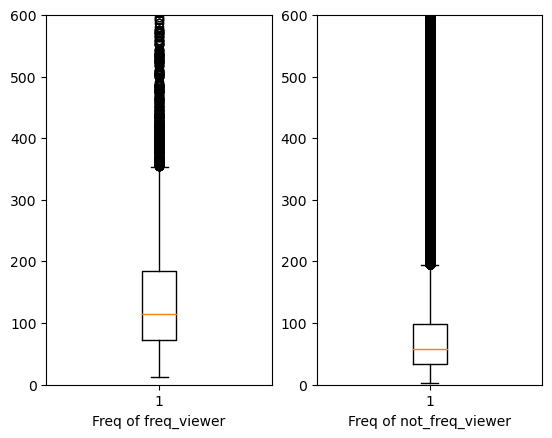

In [92]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.boxplot(freq_data['Text_length'])
ax1.set_xlabel('Freq of freq_viewer')
ax1.set_ylim(0,600)

ax2 = fig.add_subplot(122)
ax2.boxplot(not_freq_data['Text_length'])
ax2.set_xlabel('Freq of not_freq_viewer')
ax2.set_ylim(0,600)

### Sentiment Analysis

In [94]:
### polarity value(0- neutral, +1  positive sentence, -1 negative sentence)  [-1, +1]

In [95]:
!pip install textblob

In [96]:
from textblob import TextBlob

In [97]:
data['Summary']

0                      Good Quality Dog Food
1                          Not as Advertised
2                      "Delight" says it all
3                             Cough Medicine
4                                Great taffy
                         ...                
568449                   Will not do without
568450                          disappointed
568451              Perfect for our maltipoo
568452    Favorite Training and reward treat
568453                           Great Honey
Name: Summary, Length: 393931, dtype: object

In [181]:
data['Summary'][0]

'Good Quality Dog Food'

In [183]:
TextBlob('Good Quality Dog Food').sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [185]:
TextBlob('Good Quality Dog Food').sentiment.polarity

0.7

In [187]:
data.shape

(393931, 12)

In [221]:
polarity_data = []

for text in data['Summary']:
        try:
            polarity_data.append(TextBlob(text).sentiment.polarity)  # there may be missing value so we have to handle it with 0 polarity that is exception.
        except:
            polarity_data.append(0)

In [225]:
len(polarity_data)

393931

In [227]:
data['polarity'] = polarity_data

In [231]:
data_negative = data[data['polarity']<0]
data_positive = data[data['polarity']>0]

In [233]:
data_negative['Summary']

16                            poor taste
26                       Nasty No flavor
57                 How can you go wrong!
61                      pretty expensive
62                        stale product.
                       ...              
568432                           No Good
568433                  Tastes horrible!
568436    Baker's Ammonia Small quantity
568446                       Mixed wrong
568450                      disappointed
Name: Summary, Length: 36538, dtype: object

In [189]:
sample = data[0:50000]

In [191]:
polarity = []

for text in sample['Summary']:
        try:
            polarity.append(TextBlob(text).sentiment.polarity)  # there may be missing value so we have to handle it with 0 polarity that is exception.
        except:
            polarity.append(0)


In [193]:
len(polarity)

50000

In [195]:
sample['polarity'] = polarity

In [201]:
sample_negative = sample[sample['polarity']<0]
sample_positive = sample[sample['polarity']>0]

In [205]:
sample_negative['Summary']

16                  poor taste
26             Nasty No flavor
57       How can you go wrong!
61            pretty expensive
62              stale product.
                 ...          
54185                 Horrible
54186            Horrible idea
54191                    STALE
54212             Disappointed
54251      Just not very good!
Name: Summary, Length: 4659, dtype: object

In [211]:
from collections import Counter

In [217]:
Counter(sample_negative['Summary']).most_common(10)

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11)]

In [219]:
Counter(sample_positive['Summary']).most_common(10)

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50)]